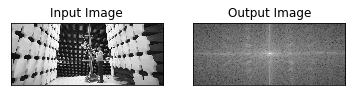

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('ai.jpg', 0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_direction = 20*np.log(np.abs(fshift))
# print(magnitude_direction)
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_direction, cmap='gray')
plt.title('Output Image'), plt.xticks([]), plt.yticks([])
plt.show()

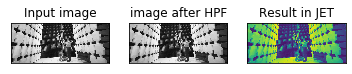

In [14]:
rows, cols = img.shape
crow, ccol = rows/2, cols/2
# fshift[crow-30:crow+30,ccol-30:ccol+30] = None
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Input image'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_back, cmap="gray")
plt.title('image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()

# Fourier Transform in OpenCV

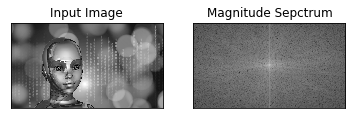

In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('download.jpeg', 0)
dft = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Sepctrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [22]:
rows, cols = img.shape
crow,ccol = rows/2 , cols/2

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

TypeError: slice indices must be integers or None or have an __index__ method